In [ ]:
from juliacall import Main as jl
import numpy as np

jl.include("batch_sgd_ns.jl")

Train (generic function with 6 methods)

## Newton-Schulz

In [2]:
G = np.random.rand(5, 5)
O = np.array(jl.NewtonSchulz5(G))

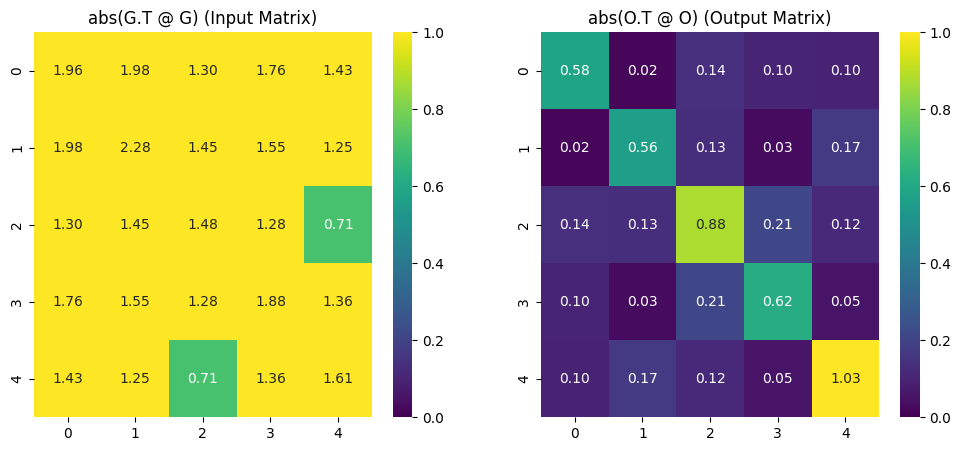

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(np.abs(G.T @ G), annot=True, fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("abs(G.T @ G) (Input Matrix)")

plt.subplot(1, 2, 2)
sns.heatmap(np.abs(O.T @ O), annot=True, fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("abs(O.T @ O) (Output Matrix)")
plt.show()

## Toy model

In [4]:
output_dim = 2
input_dim = 10
m = 100

# Imagine we have some true linear model we want to learn,
# and we generate random data for it.
# In reality, you would have multiple layers and non-linearities,
# but you can upgrade this example by implementing backpropagation.
true_W = np.random.normal(0, 1, (input_dim, output_dim))
X = np.random.rand(m, input_dim)
Y = jl.LinearPredict(true_W, X)

N_try = 50
N_epochs = 1000
batch_size = 20
learning_rate = 0.005

In [11]:
with_newton_schulz_losses = np.zeros(N_epochs)
without_newton_schulz_losses = np.zeros(N_epochs)

for _ in range(N_try):
    W = np.random.normal(0, 1, (input_dim, output_dim))

    _, losses = jl.Train(W, X, Y, N_epochs, batch_size, True, learning_rate)
    with_newton_schulz_losses += np.array(losses)

    _, losses = jl.Train(W, X, Y, N_epochs, batch_size, False, learning_rate)
    without_newton_schulz_losses += np.array(losses)
    
with_newton_schulz_losses /= N_try
without_newton_schulz_losses /= N_try

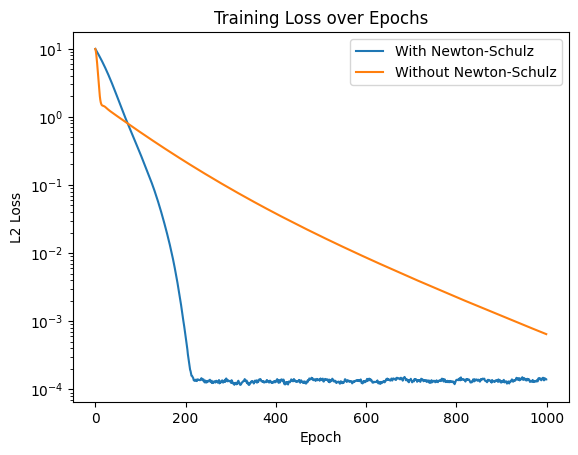

In [12]:
import matplotlib.pyplot as plt

plt.plot(with_newton_schulz_losses, label="With Newton-Schulz")
plt.plot(without_newton_schulz_losses, label="Without Newton-Schulz")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("L2 Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

### Sample prediction

In [13]:
W = np.random.normal(0, 1, (input_dim, output_dim))
W, _ = jl.Train(W, X, Y, N_epochs, batch_size)
W = np.array(W)

In [14]:
print(f"Prediction: {jl.LinearPredict(W, X)}")
print(f"Target: {Y}")

Prediction: [1.0488649310642626 3.833240483806579; 1.381200016693112 2.311708992754112; -1.2940388450271898 3.8395624213017454; -2.5719371652820526 5.010415955605219; 1.2672877334551358 2.537153167149818; -0.7448883628349371 4.055626554760899; 0.27036443321709064 3.6768283145822784; 1.0899716734921665 3.16490753932972; 0.5883617878146732 3.6141064954134223; 0.3378790449771661 3.8528627100686026; 0.7371575208320367 2.419120448152517; -0.33466460052617786 3.528642205454923; -0.2126380386448401 3.8156626029471132; -0.9088616410206474 4.30326291076942; 2.075792161684741 1.8993024866263581; 0.6288176480692311 3.6249746706399395; 1.789205163962003 1.3596679219060785; 0.2968248985421867 2.740598081355641; 1.1409816645766413 3.4623213590032256; -0.9600050491206591 3.1745888524656847; 0.08601821150746208 1.5869737909817585; -1.3600415108876407 4.400000716642812; 1.2954290555575012 1.7889361484612907; 0.30104778906837804 2.7723180617504157; -0.2358841799183642 3.3744114361340296; 0.3388804718293